<br><p><center><h1><b>Gambler's Ruin Problem Analysis</b></h1></center></p>
<p><center><h4>Author:<i> Alejandro Santiago Baca Eyssautier</i></h4></center></p>

<br><p><h4> <b>1. Introduction</b> </h4></p>

The gambler's ruin problem is a classic problem in probability theory. It involves two players who repeatedly bet one unit of money per round. One of the players, denoted as $I$, starts with $K$ units, and the other player, $D$, starts with $N - K$ units. The goal is to determine the probability that player $I$ will lose all of their money (i.e., be ruined) based on the probability $P$ of winning a round and the total units at stake.

This report simulates the gambler's ruin problem, plots the relationship between the ruin probability $U_k$ and various parameters, and compares simulated results with theoretical expectations. The following steps are conducted:
1. Simulating multiple sample paths of the gambler's ruin problem.
2. Plotting $U_k$ vs $P$ for different values of $K$.
3. Plotting $U_k$ vs $K$ for different probabilities $P$.

<br>

---

<p><h4> <b>2. Concepts and Problem Formulation</b> </h4></p>

1. **Problem Setup:**
    - **Players:**  
      - $I$ (player starting with $K$ units)  
      - $D$ (player starting with $N - K$ units)
    - **Winning and Losing Probabilities:**  
      - Player $I$ wins with probability $P$.  
      - Player $D$ wins with probability $q = 1 - P$.
  
2. **Variables:**
    - $X_n$ is the number of units player $I$ has at round $n$.
    - $\tau = \min n \in \mathbb{N} : X_n = 0$ is the time of ruin.
    - $U_k = P(X_\tau = 0 \mid X_0 = k)$ is the probability that player $I$ will be ruined starting with $k$ units.

3. **Difference Equation:**

    The ruin probabilities satisfy the following difference equation:
    $$U_{k+1} - U_k = \frac{q}{P}(U_{k-1} - U_k)$$
    With boundary conditions:
    $$U_0 = 1, \quad U_N = 0$$

**4. Theoretical Solution:**
- If $P = q$, the ruin probability is:
$$U_k = 1 - \frac{K}{N}$$
- If $P \neq q$, the ruin probability is:
$$U_k = \frac{\left(\frac{q}{P}\right)^K - \left(\frac{q}{P}\right)^N}{1 - \left(\frac{q}{P}\right)^N}, \quad \text{for } P \neq q$$

<br>

---

<p><h4> <b>3. Simulations and Analysis</b> </h4></p>

We simulate the gambler's ruin problem for $M = 10000$ sample paths. The simulation involves running multiple rounds where, at each step, player $I$ wins or loses a unit with probability $P$ and $q$, respectively. The process stops when player $I$ either runs out of units or wins the total stake.

Then, we plot the ruin probability $U_k$ as a function of the probability $P$ for different values of $K$. The simulation results are compared with the theoretical predictions.

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Parameters
N = 50  # Total units (sum of both players' units)
M = 10000  # Number of sample paths (simulations)
K_values = [5, 25, 45]  # Values of K to plot for Uk vs P
P_values = [0.25, 0.5, 0.75]  # Values of P to plot for Uk vs K
P_range = np.linspace(0.0, 1, 100) +  1e-10  # Range of P values to plot for U1 vs U2 

In [8]:
# Simulate and plot U_k vs P for different values of K
def simulate_ruin(K, N, P, M):
    """
    Simulate M paths of the gambler's ruin problem.
    
    Parameters:
    K - Initial units for player I
    N - Total units
    P - Probability that player I wins a round
    M - Number of sample paths (simulations)
    
    Returns:
    Probability that player I will be ruined (P(X_tau = 0 | X_0 = K))
    """
    wins = 0
    for _ in range(M):
        current_K = K
        while current_K > 0 and current_K < N:
            if np.random.rand() < P:
                current_K += 1  # Player I wins
            else:
                current_K -= 1  # Player D wins
        if current_K == 0:
            wins += 1  # Player I is ruined
    
    return wins / M


# Plot U_k vs P for different values of K
def theoretical_uk(K, N, P):
    """Theoretical probability of ruin for player I."""
    q = 1 - P
    if P == q:
        return 1 - (K / N)
    else:
        return ((q / P) ** K - (q / P) ** N) / (1 - (q / P) ** N)

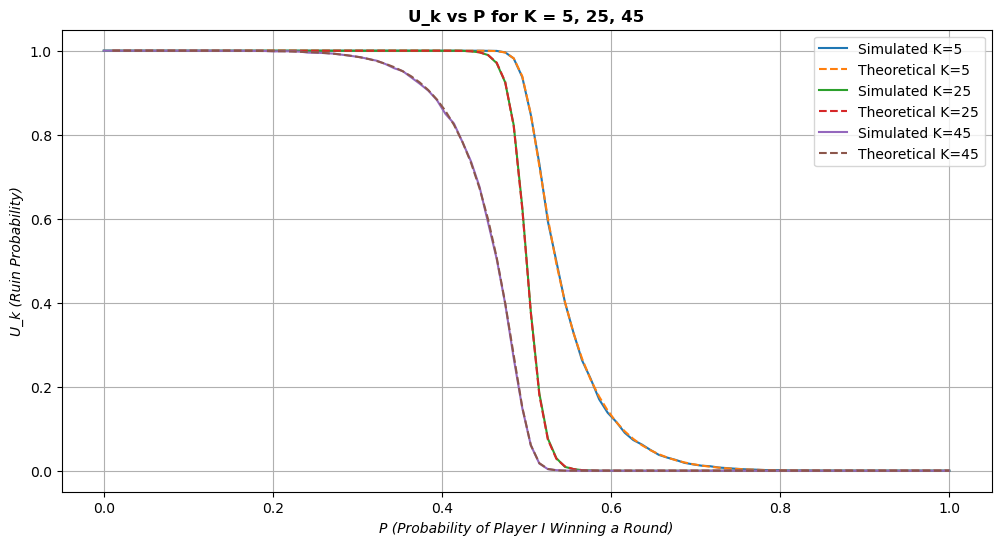

In [9]:
# Plot U_k vs P for K = 5, 25, 45
plt.figure(figsize=(12, 6))
for K in K_values:
    U_k_sim = [simulate_ruin(K, N, P, M) for P in P_range]
    U_k_theory = [theoretical_uk(K, N, P) for P in P_range]
    plt.plot(P_range, U_k_sim, label=f'Simulated K={K}')
    plt.plot(P_range, U_k_theory, '--', label=f'Theoretical K={K}')

plt.title('U_k vs P for K = 5, 25, 45', fontweight='bold')
plt.xlabel('P (Probability of Player I Winning a Round)', fontstyle='italic')
plt.ylabel('U_k (Ruin Probability)', fontstyle='italic')
plt.legend()
plt.grid(True)
plt.show()

<br>

We next plot the ruin probability $U_k$ as a function of $K$ for three different values of $P$. Again, the simulation results are compared with the theoretical predictions.

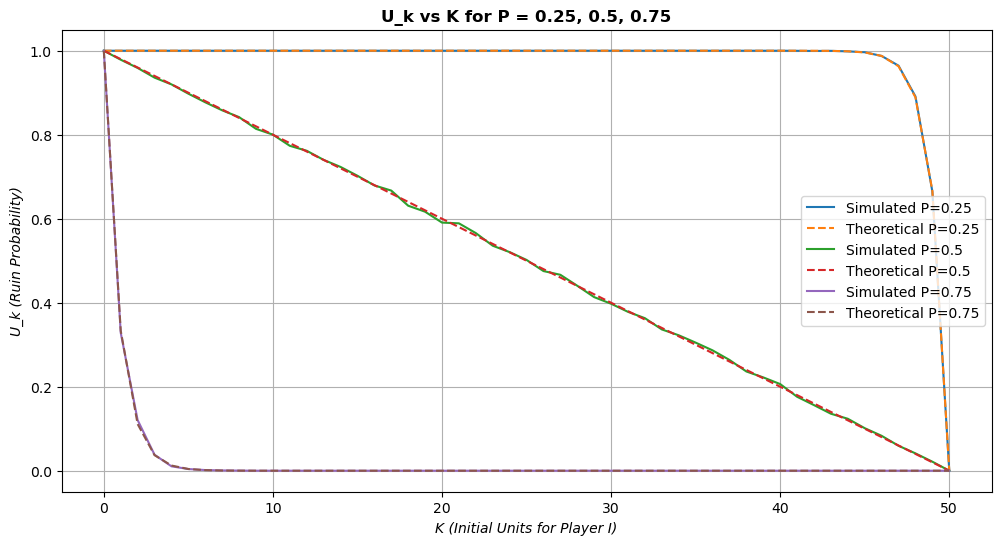

In [13]:
# Plot U_k vs K for 3 different P's
plt.figure(figsize=(12, 6))
K_range = np.arange(0, N + 1)
for P in P_values:
    U_k_sim = [simulate_ruin(K, N, P, M) for K in K_range]
    U_k_theory = [theoretical_uk(K, N, P) for K in K_range]
    plt.plot(K_range, U_k_sim, label=f'Simulated P={P}')
    plt.plot(K_range, U_k_theory, '--', label=f'Theoretical P={P}')

plt.title('U_k vs K for P = 0.25, 0.5, 0.75', fontweight='bold')
plt.xlabel('K (Initial Units for Player I)', fontstyle='italic')
plt.ylabel('U_k (Ruin Probability)', fontstyle='italic')
plt.legend()
plt.grid(True)
plt.show()

<br>

---

<p><h4> <b>5. Results Analysis</b> </h4></p>

**1. Analysis of $U_k$ vs $P$:**
- For each $K$, we observe that as the probability $P$ increases (i.e., player $I$ has a higher chance of winning a round), the ruin probability decreases, as expected.
- For smaller $K$ (e.g., $K = 5$), the ruin probability is higher even when $P$ is large, indicating that starting with fewer units makes the player more vulnerable to ruin.
- The theoretical predictions and the simulated results are closely aligned, confirming the validity of the simulation.

**2. Analysis of $U_k$ vs $K$:**
- As $K$ increases, the probability of ruin decreases, as player $I$ starts with more units and thus has a better chance of surviving until player $D$ is ruined.
- For $P = 0.5$, the probability of ruin follows a more linear trend, as both players have equal chances of winning.
- For $P = 0.25$ and $P = 0.75$, the curves are steeper, reflecting the greater imbalance in winning probabilities.

<br>

---

<p><h4> <b>6. Conclusion</b> </h4></p>

The gambler's ruin problem provides a fascinating glimpse into probabilistic decision-making and risk analysis. Through both simulation and theoretical analysis, we observe that:
- The ruin probability $U_k$ is heavily influenced by both the starting units $K$ and the probability $P$ of winning each round.
- Theoretical solutions derived from the difference equation closely match the simulation results, verifying the accuracy of the simulation approach.
- This model could be extended by exploring other variations, such as adding a stopping condition or varying the bet size.

The simulation techniques presented here allow for a deeper understanding of the gambler's ruin problem and its applications in financial modeling, risk management, and decision theory.